In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from helper_methods import *


In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(r"./IMDB_Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


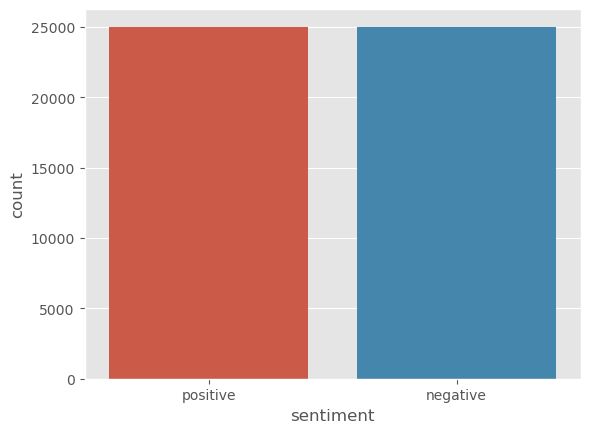

In [7]:
sns.countplot(x = "sentiment" , data= df)
plt.show()

In [8]:
df['word_count'] = df['review'].apply(get_word_count)

In [9]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


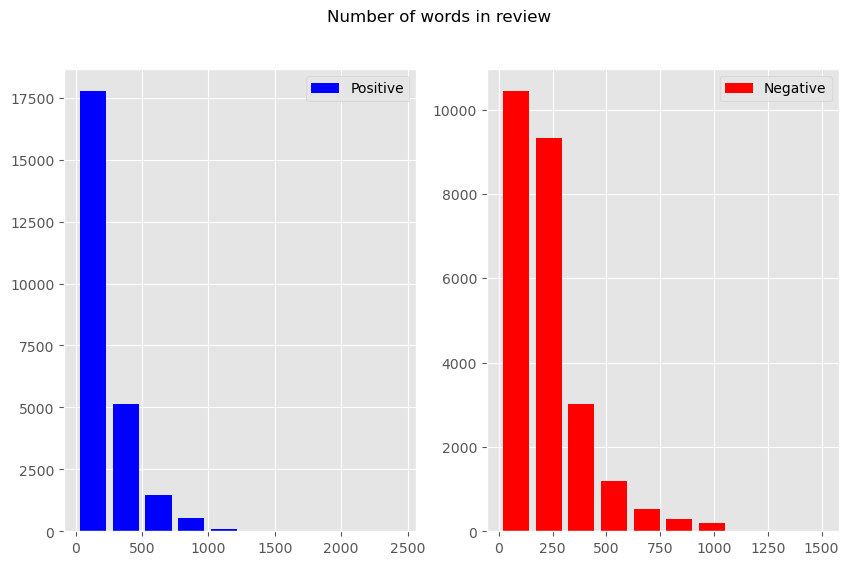

In [10]:
fig, ax = plt.subplots(1,2 , figsize = (10,6))

ax[0].hist(df[df['sentiment'] == 'positive']['word_count'] ,label = "Positive" , color = 'blue' , rwidth= 0.8)
ax[0].legend()
ax[1].hist(df[df['sentiment'] == 'negative']['word_count'] ,label = "Negative" , color = 'red' , rwidth= 0.8) 
ax[1].legend()
fig.suptitle("Number of words in review")
plt.show()


In [11]:
df['sentiment'].replace({'positive' : 1 , 'negative' : 0} , inplace= True)

In [12]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [13]:
df['review'] = df['review'].apply(data_preprocessing)

In [14]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [15]:
print(f"Number of duplicate entries = {df.duplicated().sum()}")

Number of duplicate entries = 421


In [16]:
df = df.drop_duplicates('review')